In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('https://raw.githubusercontent.com/pedroest13/PR2/main/Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [57]:
#Transformacion
def transform():
  df.drop(columns='furnishingstatus')
transform()

In [58]:
def load(file):
  df.to_csv(file)

In [50]:
#Definir variables de interes
yvar = ['price']
Xvars = ['area', 'bedrooms','bathrooms','stories','parking']
yvar_pred = [yvar[0] + 'predicted']


In [51]:
#Separar Variables
y = df[yvar]
X = df[Xvars]

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 0)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
#Entrenamiento
# Creando el modelo
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

modelo = MLPRegressor(solver='lbfgs', max_iter=1500, random_state=1,hidden_layer_sizes=(30,))

# modelo = RandomForestRegressor(random_state=1)    # Regresión bosques aleatorios

# Entrenando el modelo
modelo.fit(X_train, y_train.values.ravel())

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(hidden_layer_sizes=(30,), max_iter=1500, random_state=1,
             solver='lbfgs')

In [54]:
#Evaluacion
df[yvar_pred[0]] = modelo.predict(X)
y_eval = modelo.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error


r2 = r2_score(y_test, y_eval)
r2

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


0.5149437335341891

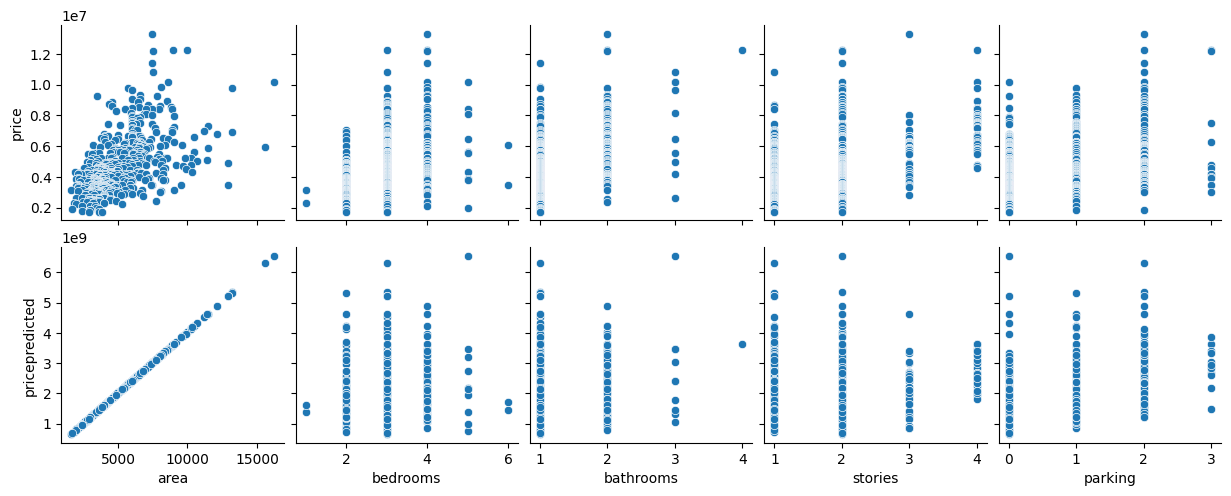

In [55]:
sns.pairplot(df, x_vars = Xvars, y_vars = yvar + yvar_pred)

In [ ]:
#Prediccion
x_pred = pd.DataFrame({'area': [3000],
                       'bathrooms': [12],
                       'bedrooms': [10],
                       'stories': [3],
                       'parking': [2]})

y_pred = modelo.predict(x_pred)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


array([1.17212601e+09])